In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

arguments for relplot()

sns.relplot(

    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=None,
    dashes=None,
    style_order=None,
    legend='brief',
    kind='scatter',
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)

### Scatter Charts

To explore seaborn's plotting functionality, we'll start by making a scatter chart of the tips data set. We'll plot total bill amount against the tip amount.

We will use the relplot function which we'll need to supply several keyword arguments to:

    data: a pandas dataframe that contains the data we want to plot
    
    x: the name of the column that will be the x value
    
    y: the name of the column that will be the y value

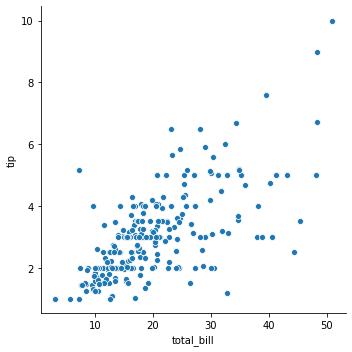

In [4]:
sns.relplot(x='total_bill', y='tip', data=tips)


Once the figure has been produced by seaborn, we can treat it as any other matplotlib figure, i.e. we can set a title or change the axis labels the same way we have in the past. We also would create subplots the same way.

Text(10.049999999999997, 0.5, 'Tip ($)')

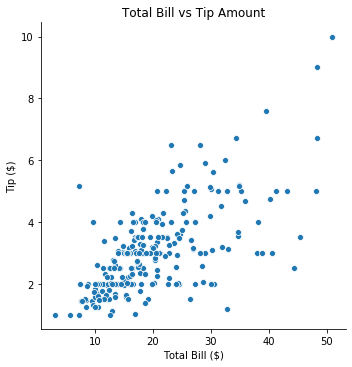

In [5]:
sns.relplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

One of the most useful features of seaborn is the ability to easily break down quantitative data by a qualitative measure. For example, to create two separate charts that represent the two different times of day in our data set, we can simply use the col keyword argument, and specify the name of the column:

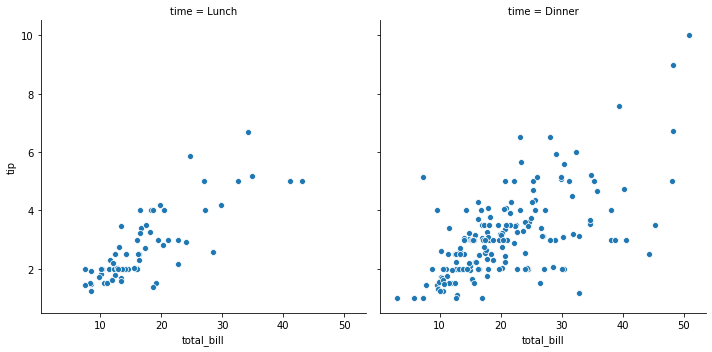

In [6]:
sns.relplot(x='total_bill', y='tip', col='time', data=tips)


Like the col keyword argument, we can use the hue keyword argument to separate the data points by color:



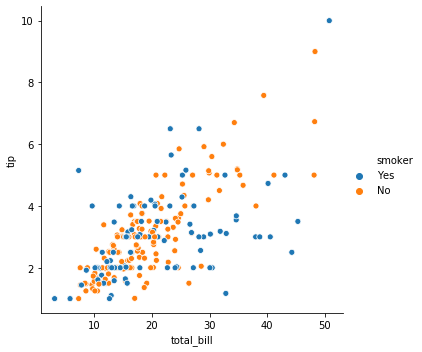

In [7]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)


We can also change the shape of the data points with the style keyword argument:



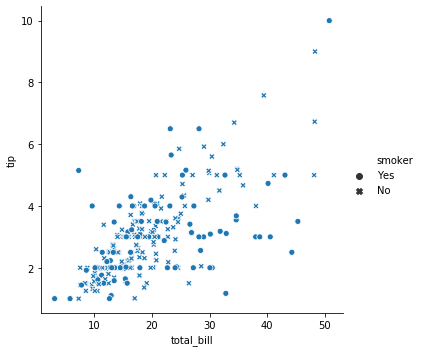

In [9]:
sns.relplot(x='total_bill', y='tip', style='smoker', data=tips)


All of these options can be combined as well:



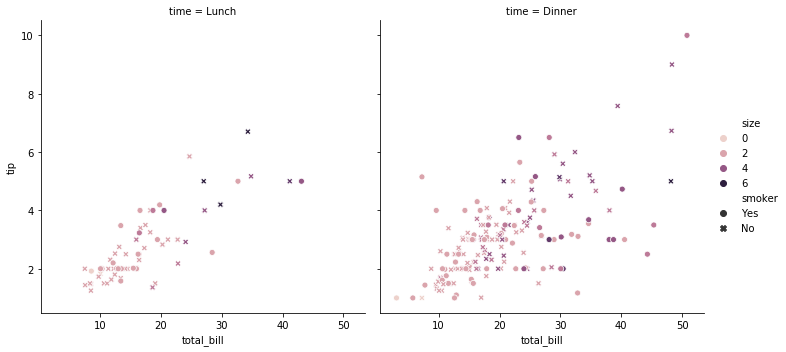

In [10]:
sns.relplot(x='total_bill', y='tip', col='time', hue='size', style='smoker', data=tips)


But, (as you can see from the chart above), adding all of these options is not always a good choice and can lead to a chart that is too busy.



### Other Chart Types

distplot is a function that can be used to check the distribution of a dataset.

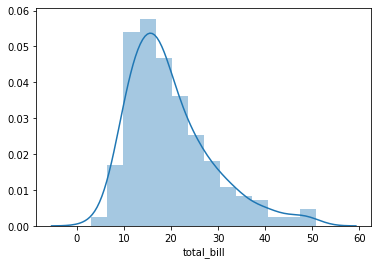

In [11]:
sns.distplot(tips.total_bill)


The boxplot function has all the same conveniences we've come to expect of seaborn:



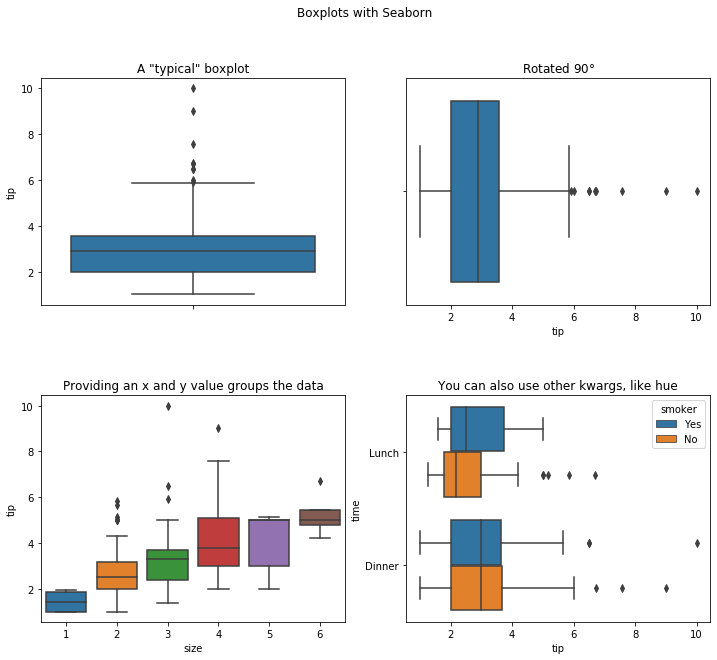

In [12]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)


The heatmap function can be used to visualize tabular data:



size,1,2,3,4,5,6
time,,,,,,
Lunch,2,52,5,5,1,3
Dinner,2,104,33,32,4,1


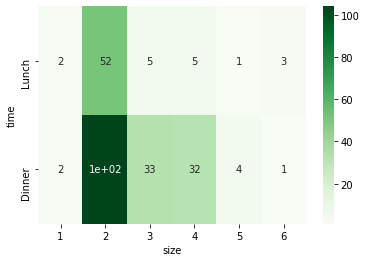

In [13]:
data = pd.crosstab(tips.time, tips['size'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

In [16]:
# This pulls up documentation as well
sns.heatmap?

Text(0.5, 1.0, 'tip')

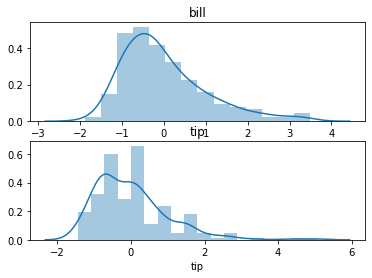

In [14]:
def scale(series):
    return (series - series.mean()) / series.std()

df = pd.DataFrame({'bill': scale(tips.total_bill),
                   'tip': scale(tips.tip)})

plt.subplot(211)
sns.distplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.distplot(df.tip)
plt.title('tip')

To get a very broad view of an entire data set, the pairplot function can be used. It will visualize the relationship between every quantitative feature in a dataset. Excellent for 
exploration through visualization.

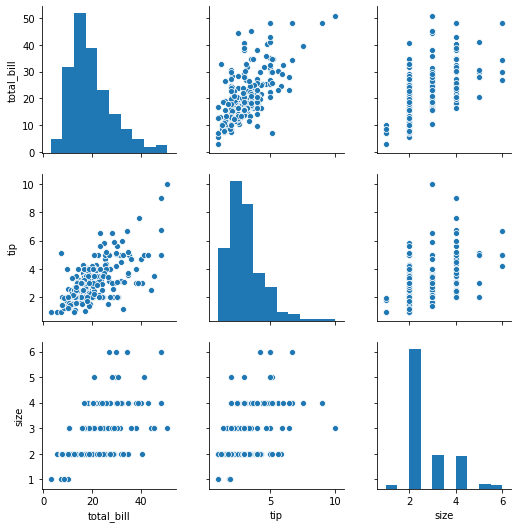

In [15]:
sns.pairplot(tips)


We can use jointplot to combine two visualizations:



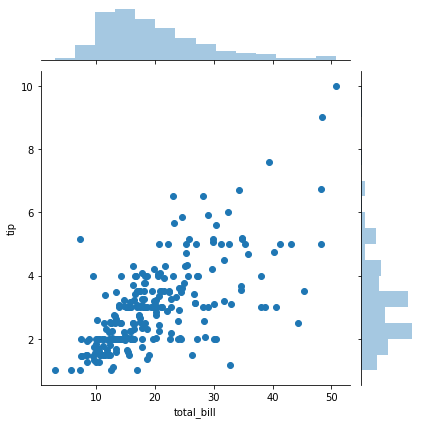

In [17]:
sns.jointplot(data=tips, x='total_bill', y='tip')


In [20]:
tips.pivot_table("total_bill", "size", "smoker", aggfunc="mean")


smoker,Yes,No
size,,
1,5.825000,8.660000
2,17.955758,15.342333
3,28.191667,21.009615
4,30.609091,27.769231
5,29.305000,30.576667
6,NaN,34.830000


In [21]:
tips.pivot_table("total_bill", "size", ["smoker", "time"], aggfunc="mean")

smoker        Yes                    No           
time        Lunch     Dinner      Lunch     Dinner
size                                              
1        8.580000   3.070000  10.070000   7.250000
2       16.265556  18.589583  14.156765  16.062143
3       17.590000  30.312000  19.146667  21.252609
4       31.820000  30.340000  28.703333  27.647391
5             NaN  29.305000  41.190000  25.270000
6             NaN        NaN  30.383333  48.170000